##**NLP** (spam detection,text classification)
Dataset Source: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

-importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

In [2]:
sms = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


-Pre-processing Data

In [4]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [5]:
sms.columns = ['labels', 'data']

In [6]:
sms.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
X = sms['data']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: data, Length: 5572, dtype: object

In [8]:
y = sms['labels'].map({'ham': 0, 'spam': 1}).values
y

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
sms.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
X_train.shape

(3733,)

In [12]:
X_test.shape

(1839,)

-Text Pre-processing

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
tokenizer = Tokenizer(num_words=20000)

In [15]:
tokenizer.fit_on_texts(X_train)

In [16]:
seq_train = tokenizer.texts_to_sequences(X_train)

In [17]:
seq_test = tokenizer.texts_to_sequences(X_test)

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
data_train = pad_sequences(seq_train)
data_train

array([[   0,    0,    0, ...,    2,   56,  654],
       [   0,    0,    0, ...,  830,   77,   63],
       [   0,    0,    0, ...,   29,  485, 3334],
       ...,
       [   0,    0,    0, ...,  123, 1964, 7157],
       [   0,    0,    0, ..., 1065,  125, 1256],
       [   0,    0,    0, ...,   93,   31, 7158]], dtype=int32)

In [20]:
data_train.shape

(3733, 189)

In [21]:
data_test = pad_sequences(seq_test, maxlen=data_train.shape[1])
data_test

array([[   0,    0,    0, ...,  279,  204, 6989],
       [   0,    0,    0, ...,   85,    5,  110],
       [   0,    0,    0, ...,    2,  301,  293],
       ...,
       [   0,    0,    0, ...,    9,    5,  221],
       [   0,    0,    0, ...,   10,   46,   82],
       [   0,    0,    0, ...,   41,   31,  270]], dtype=int32)

In [22]:
data_test.shape

(1839, 189)

-Exploring Data

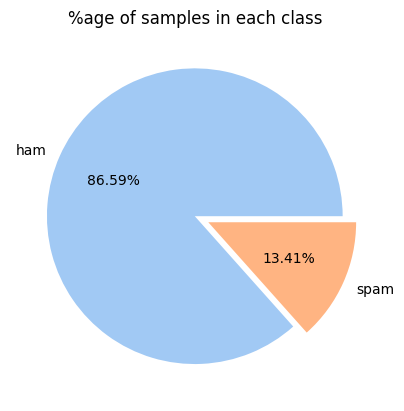

In [23]:
plt.title('%age of samples in each class')
plt.pie(sms['labels'].value_counts(),labels=['ham','spam'],colors=sns.color_palette('pastel'),explode=[0,0.1],autopct='%.2f%%')
plt.show()

<Axes: xlabel='labels', ylabel='count'>

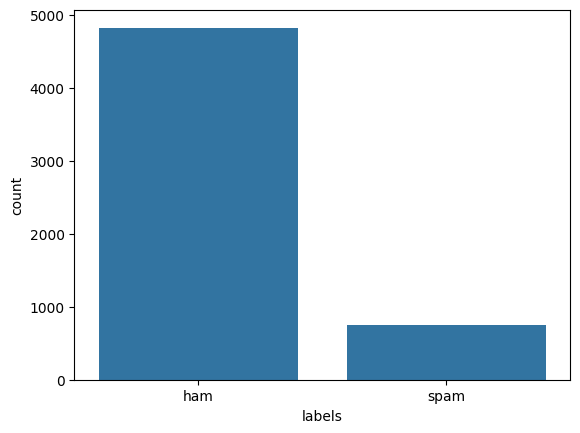

In [24]:
sns.countplot(x=sms['labels'])

-Model Training & Building

In [25]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [26]:
# Input layer
i = Input(shape=(data_train.shape[1],))  # input layer takes in sequences of integers

# Embedding layer
x = Embedding(len(tokenizer.word_index) + 1, 20)(i) # This takes in sequences of integers and returns sequences of word vectors

# LSTM layer
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)
# it is an binary classification problem, so we are using activation function ='sigmoid'

model = Model(i, x)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
hist = model.fit(x=data_train, y=y_train, epochs=20, validation_data=(data_test, y_test))

Epoch 1/20
117/117 [==============================] - 12s 86ms/step - loss: 0.4741 - accuracy: 0.8647 - val_loss: 0.3962 - val_accuracy: 0.8641
Epoch 2/20
117/117 [==============================] - 8s 72ms/step - loss: 0.3833 - accuracy: 0.8669 - val_loss: 0.3666 - val_accuracy: 0.8641
Epoch 3/20
117/117 [==============================] - 8s 66ms/step - loss: 0.3180 - accuracy: 0.8669 - val_loss: 0.2745 - val_accuracy: 0.8641
Epoch 4/20
117/117 [==============================] - 9s 75ms/step - loss: 0.2061 - accuracy: 0.8878 - val_loss: 0.1858 - val_accuracy: 0.9668
Epoch 5/20
117/117 [==============================] - 10s 84ms/step - loss: 0.1040 - accuracy: 0.9912 - val_loss: 0.1174 - val_accuracy: 0.9712
Epoch 6/20
117/117 [==============================] - 9s 78ms/step - loss: 0.0536 - accuracy: 0.9946 - val_loss: 0.0919 - val_accuracy: 0.9706
Epoch 7/20
117/117 [==============================] - 11s 92ms/step - loss: 0.0328 - accuracy: 0.9968 - val_loss: 0.0815 - val_accuracy: 0.9

-Model Evaluation

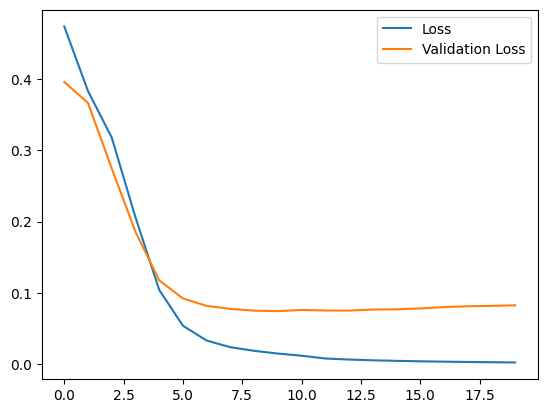

In [29]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

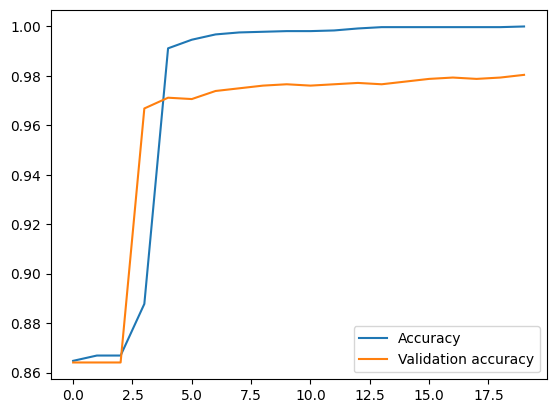

In [30]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()